이미지 로드 및 밝기 조정 결과 시각화 시작: training\Left_training\arrow_20251023_201028_0000_flipped.png


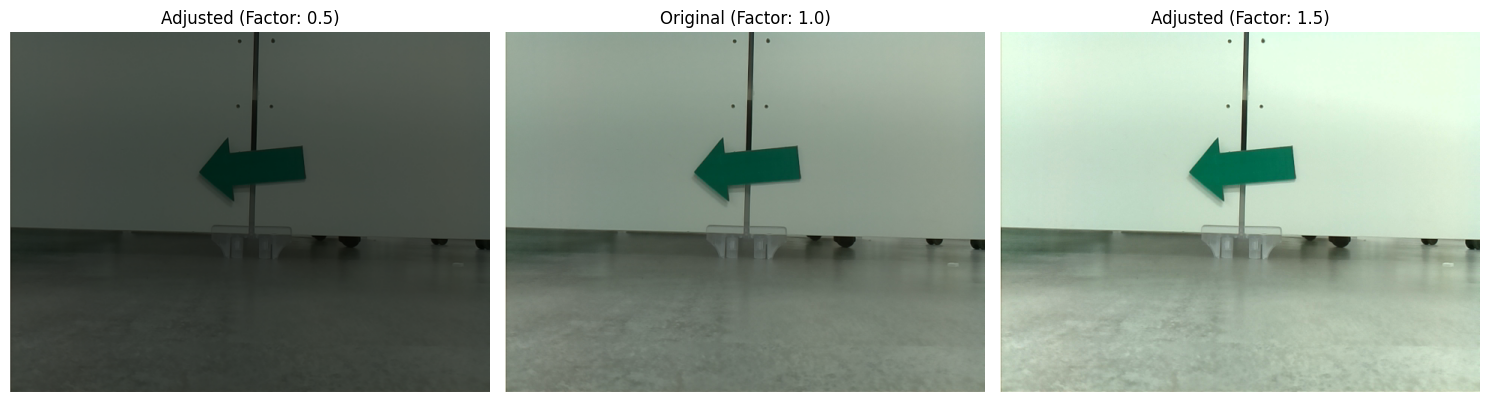


✅ 밝기 조정 결과 시각화 완료.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# ----------------------------------------------------------------------
# 1. 파일 경로 설정
# ----------------------------------------------------------------------

# 파일 경로: 'training/Left_training/' 폴더가 현재 노트북 파일과 같은 위치에 있다고 가정합니다.
image_path = os.path.join('training', 'Left_training', 'arrow_20251023_201028_0000_flipped.png')

# ----------------------------------------------------------------------
# 2. 밝기 조정 함수 (HSV 기반) - 이전과 동일
# ----------------------------------------------------------------------

def adjust_brightness_in_hsv(image, brightness_factor):
    """
    HSV 색 공간의 V(Value) 채널을 조정하여 밝기를 변경합니다.
    """
    if image is None:
        return None
        
    # 1. BGR -> HSV 변환
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # 2. V(Value) 채널 조정: 팩터를 곱하고 0~255 범위로 클리핑
    v_new = np.clip(v * brightness_factor, 0, 255).astype(np.uint8)
    
    # 3. 채널 병합 및 HSV -> BGR 재변환
    hsv_new = cv2.merge([h, s, v_new])
    adjusted_img = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)
    return adjusted_img

# ----------------------------------------------------------------------
# 3. 이미지 로드 및 밝기 조정 결과 시각화
# ----------------------------------------------------------------------

print(f"이미지 로드 및 밝기 조정 결과 시각화 시작: {image_path}")

# OpenCV로 이미지 읽기 (BGR 포맷)
original_img = cv2.imread(image_path)

if original_img is None:
    print(f"❌ 오류: 이미지를 읽을 수 없습니다. 경로를 확인해주세요: {image_path}")
else:
    # 적용할 밝기 계수들
    brightness_factors_to_test = [0.5, 1.0, 1.5] # 어둡게, 원본, 밝게

    plt.figure(figsize=(15, 5)) # 세 개의 이미지를 나란히 표시하기 위한 피규어 크기

    for i, factor in enumerate(brightness_factors_to_test):
        # 밝기 계수가 1.0이면 원본 이미지를 사용 (불필요한 변환 방지)
        if factor == 1.0:
            display_img = original_img
            title_text = "Original (Factor: 1.0)"
        else:
            # 밝기 조정 적용
            display_img = adjust_brightness_in_hsv(original_img, factor)
            title_text = f"Adjusted (Factor: {factor})"
        
        # Matplotlib 표시를 위해 BGR -> RGB로 변환
        display_img_rgb = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)
        
        # 서브플롯에 이미지 표시
        plt.subplot(1, len(brightness_factors_to_test), i + 1)
        plt.title(title_text)
        plt.imshow(display_img_rgb)
        plt.axis('off')

    plt.tight_layout() # 서브플롯 간 간격 자동 조정
    plt.show()

    print("\n✅ 밝기 조정 결과 시각화 완료.")